In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier


In [2]:
#import dataset from Resources Folder
file = "Resources/diabetes_data_cleaned.csv"
df = pd.read_csv(file)

In [3]:
# Separate the features (X) and target (y) variable
X = df.drop('DiabetesDiagnosis', axis=1)
y = df['DiabetesDiagnosis']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# from sklearn.model_selection import GridSearchCV

# # Define a larger parameter grid with more parameters
# param_grid = {
#     'gradient_boosting__n_estimators': [100, 200, 300],
#     'gradient_boosting__learning_rate': [0.1, 0.01, 0.001],
#     'gradient_boosting__max_depth': [3, 5, 7],
#     'gradient_boosting__subsample': [0.8, 0.9, 1.0],
#     'gradient_boosting__min_samples_split': [2, 5, 10]
# }

# # Create a GridSearchCV object with more cross-validation folds
# grid_search = GridSearchCV(gradient_boosting_pipeline, param_grid, cv=5, scoring='accuracy')

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f"Best Parameters: {best_params}")
# print(f"Best Cross-Validation Accuracy: {best_score:.3f}")

# # Evaluate the best model on the test set
# best_model = grid_search.best_estimator_
# test_accuracy = best_model.score(X_test, y_test)
# print(f"Test Accuracy: {test_accuracy:.3f}")

Final Test Accuracy: 0.756


C:\Users\14192\AppData\Local\Temp\ipykernel_5240\886524919.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='coolwarm')


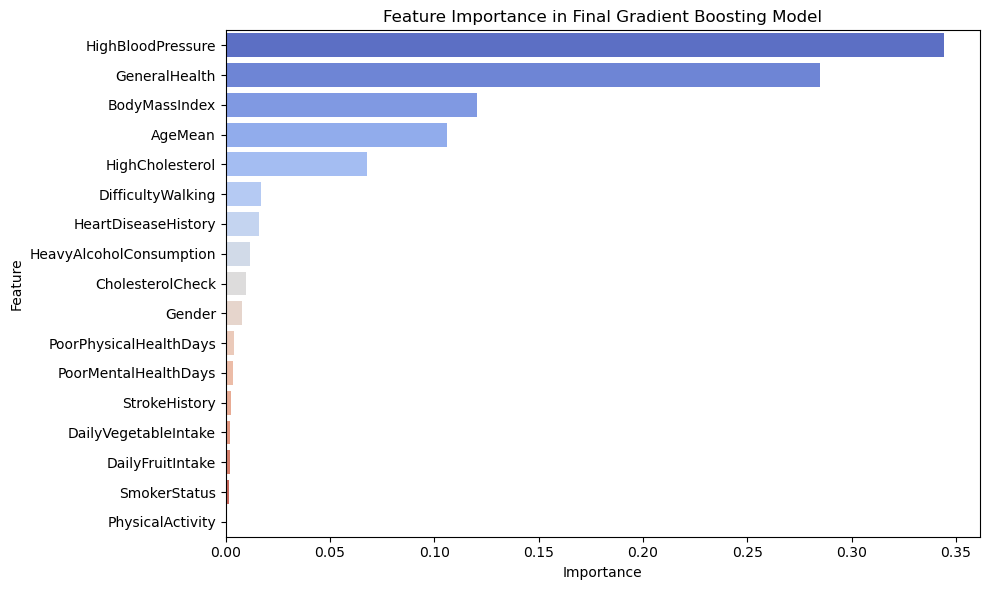

                    Feature  Importance
16        HighBloodPressure    0.344331
11            GeneralHealth    0.284835
4             BodyMassIndex    0.120282
0                   AgeMean    0.105857
2           HighCholesterol    0.067682
14        DifficultyWalking    0.016771
6       HeartDiseaseHistory    0.016018
10  HeavyAlcoholConsumption    0.011598
3          CholesterolCheck    0.009550
1                    Gender    0.007637


In [5]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the final Gradient Boosting model with the best parameters
final_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=5,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)

# Train the final model on the entire training set
final_model.fit(X_train, y_train)

# Evaluate the model on the test set
final_test_accuracy = final_model.score(X_test, y_test)
print(f"Final Test Accuracy: {final_test_accuracy:.3f}")

# Get feature importances from the final model
feature_importances = final_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='coolwarm')
plt.title('Feature Importance in Final Gradient Boosting Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Display the top 10 features for reference
print(feature_importance_df.head(10))


In [6]:
# Set a threshold for feature importance
threshold = 0.01

# Filter features with importance above the threshold
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()

# Create a new X dataset with only the important features
X_selected = X[important_features]

# Split the data again using the selected features
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# Retrain the final Gradient Boosting model with selected features
final_model_selected = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=5,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)

final_model_selected.fit(X_train_selected, y_train_selected)

# Evaluate the new model
final_test_accuracy_selected = final_model_selected.score(X_test_selected, y_test_selected)
print(f"Test Accuracy with Selected Features: {final_test_accuracy_selected:.3f}")


Test Accuracy with Selected Features: 0.750


In [7]:
from sklearn.metrics import classification_report, confusion_matrix

# Define a Gradient Boosting model with regularization
regularized_model = GradientBoostingClassifier(
    learning_rate=0.05,      # Lower learning rate
    max_depth=3,            # Regularized tree depth
    min_samples_split=10,   # Larger minimum samples split
    n_estimators=200,       # Number of boosting stages
    subsample=0.8,          # Use 80% of data for each boosting stage
    random_state=42
)

# Train the regularized model on the full feature set
regularized_model.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy_regularized = regularized_model.score(X_test, y_test)
print(f"Test Accuracy (Regularized Model): {test_accuracy_regularized:.3f}")


Test Accuracy (Regularized Model): 0.753


Classification Report (Regularized Model):
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.75     14139
weighted avg       0.76      0.75      0.75     14139

Confusion Matrix:
[[5052 2038]
 [1450 5599]]


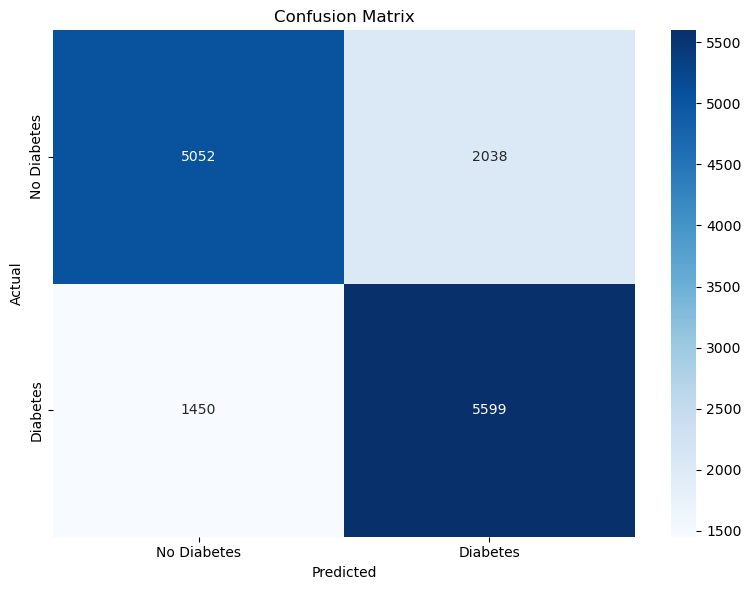

In [8]:
# Make predictions on the test set
y_pred = regularized_model.predict(X_test)

# Generate a classification report
print("Classification Report (Regularized Model):")
print(classification_report(y_test, y_pred))

# Display a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


C:\Users\14192\AppData\Local\Temp\ipykernel_5240\2562034685.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='viridis')


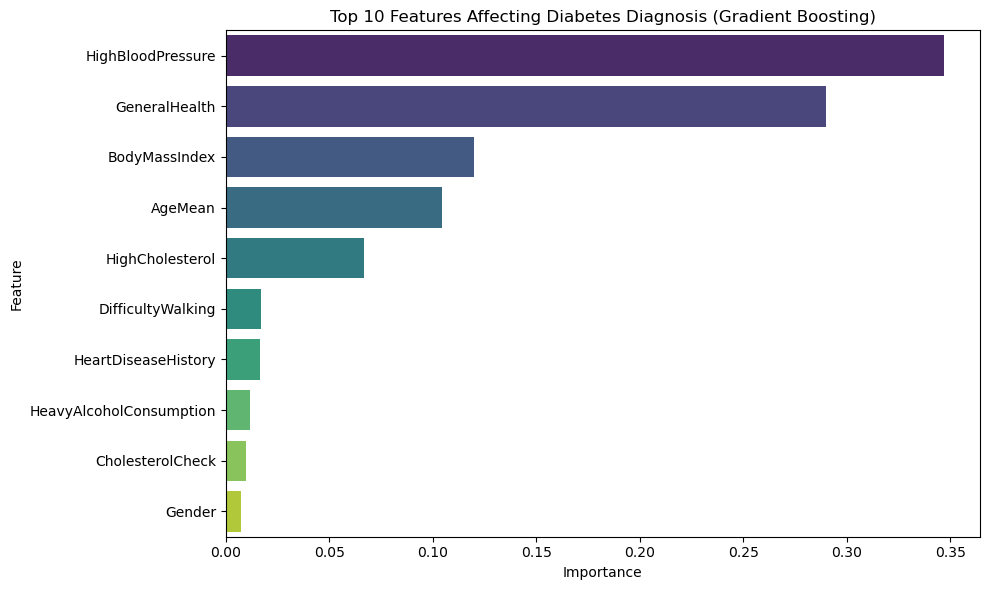

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for Gradient Boosting feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': regularized_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Create a bar chart for the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Features Affecting Diabetes Diagnosis (Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


C:\Users\14192\AppData\Local\Temp\ipykernel_5240\449359674.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df_age_72.head(10), x='Importance', y='Feature', palette='viridis')


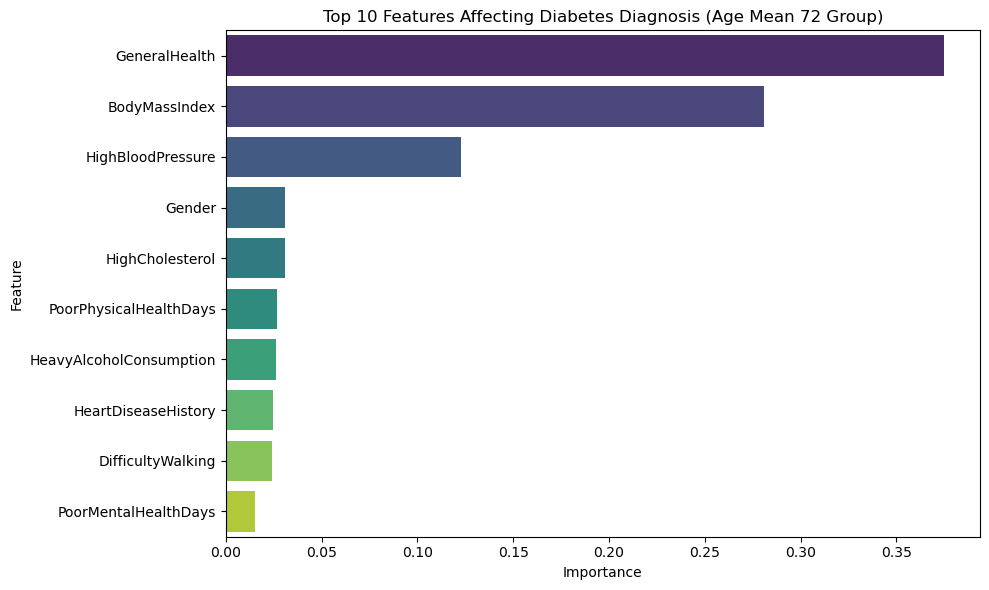

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset for Age Mean 72 group
X_age_72 = X[df['AgeMean'] == 72]
y_age_72 = y[df['AgeMean'] == 72]

# Train the Gradient Boosting model on the Age Mean 72 group
regularized_model_age_72 = GradientBoostingClassifier(
    learning_rate=0.05,      # Regularized learning rate
    max_depth=3,            # Regularized tree depth
    min_samples_split=10,   # Larger minimum samples split
    n_estimators=200,       # Number of boosting stages
    subsample=0.8,          # Use 80% of data for each boosting stage
    random_state=42
)

regularized_model_age_72.fit(X_age_72, y_age_72)

# Get feature importances from the model
feature_importances_age_72 = regularized_model_age_72.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df_age_72 = pd.DataFrame({
    'Feature': X_age_72.columns,
    'Importance': feature_importances_age_72
}).sort_values(by='Importance', ascending=False)

# Create a bar chart for the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df_age_72.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Features Affecting Diabetes Diagnosis (Age Mean 72 Group)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Accuracy for Age Mean 72 Group: 0.730
Classification Report (Age Mean 72 Group):
              precision    recall  f1-score   support

         0.0       0.69      0.50      0.58       602
         1.0       0.74      0.87      0.80      1007

    accuracy                           0.73      1609
   macro avg       0.72      0.68      0.69      1609
weighted avg       0.72      0.73      0.72      1609



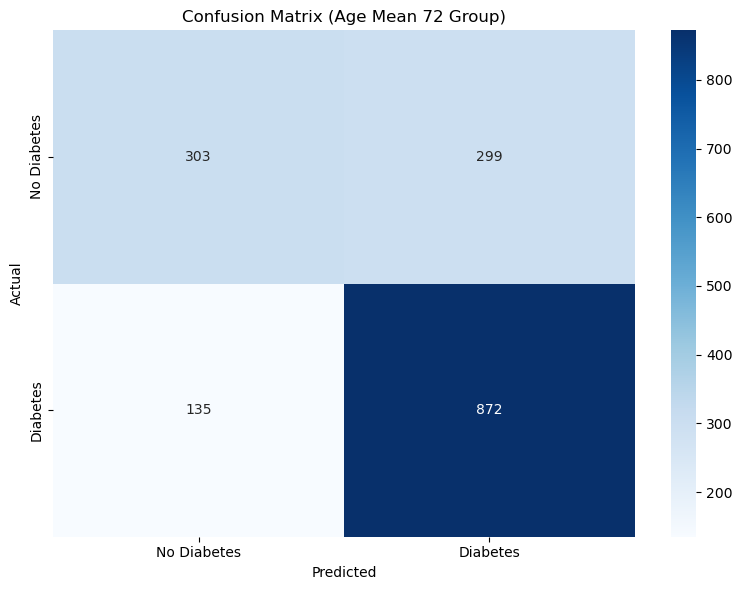

C:\Users\14192\AppData\Local\Temp\ipykernel_5240\2744591192.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df_age_72.head(10), x='Importance', y='Feature', palette='viridis')


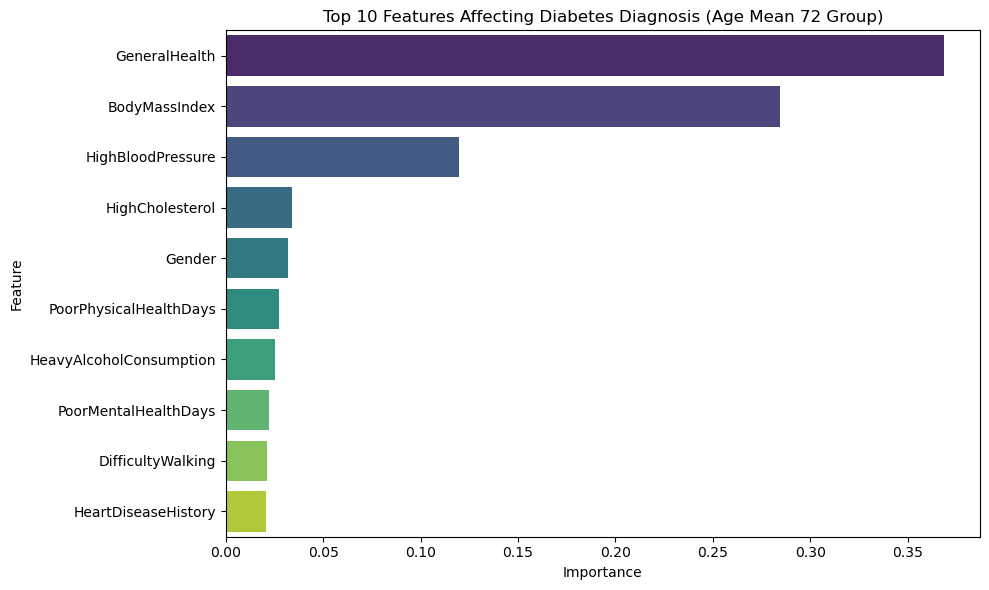

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier

# Filter the dataset for Age Mean 72 group
X_age_72 = X[df['AgeMean'] == 72]
y_age_72 = y[df['AgeMean'] == 72]

# Split the Age Mean 72 group into training and testing sets
from sklearn.model_selection import train_test_split
X_train_72, X_test_72, y_train_72, y_test_72 = train_test_split(X_age_72, y_age_72, test_size=0.2, random_state=42)

# Train the Gradient Boosting model on the Age Mean 72 group
regularized_model_age_72 = GradientBoostingClassifier(
    learning_rate=0.05,      # Regularized learning rate
    max_depth=3,            # Regularized tree depth
    min_samples_split=10,   # Larger minimum samples split
    n_estimators=200,       # Number of boosting stages
    subsample=0.8,          # Use 80% of data for each boosting stage
    random_state=42
)

regularized_model_age_72.fit(X_train_72, y_train_72)

# Evaluate the model on the test set
y_pred_72 = regularized_model_age_72.predict(X_test_72)
accuracy_72 = accuracy_score(y_test_72, y_pred_72)
print(f"Accuracy for Age Mean 72 Group: {accuracy_72:.3f}")

# Classification report
print("Classification Report (Age Mean 72 Group):")
print(classification_report(y_test_72, y_pred_72))

# Confusion matrix
conf_matrix_72 = confusion_matrix(y_test_72, y_pred_72)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_72, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix (Age Mean 72 Group)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Feature Importances
feature_importances_age_72 = regularized_model_age_72.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df_age_72 = pd.DataFrame({
    'Feature': X_age_72.columns,
    'Importance': feature_importances_age_72
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df_age_72.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Features Affecting Diabetes Diagnosis (Age Mean 72 Group)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [12]:
print(df[['GeneralHealth', 'DiabetesDiagnosis']].corr())


                   GeneralHealth  DiabetesDiagnosis
GeneralHealth           1.000000           0.407612
DiabetesDiagnosis       0.407612           1.000000


Accuracy without GeneralHealth: 0.699


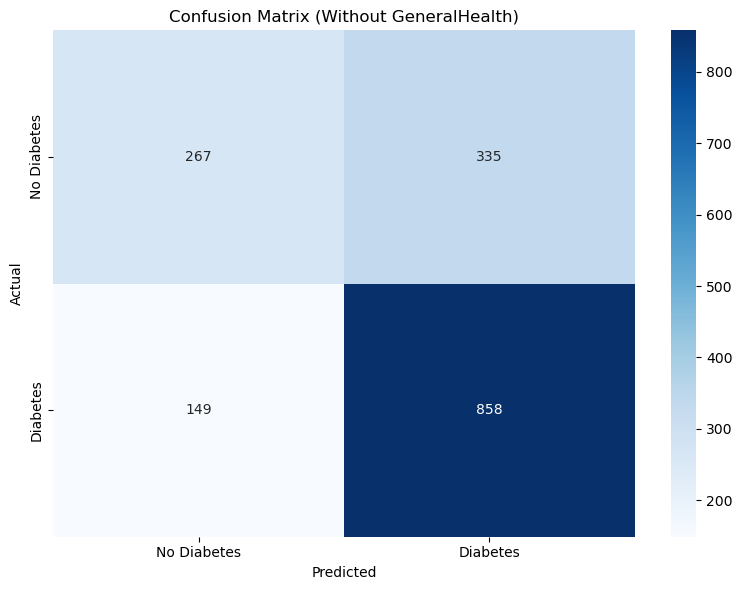

C:\Users\14192\AppData\Local\Temp\ipykernel_5240\3809399432.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df_no_gh.head(10), x='Importance', y='Feature', palette='viridis')


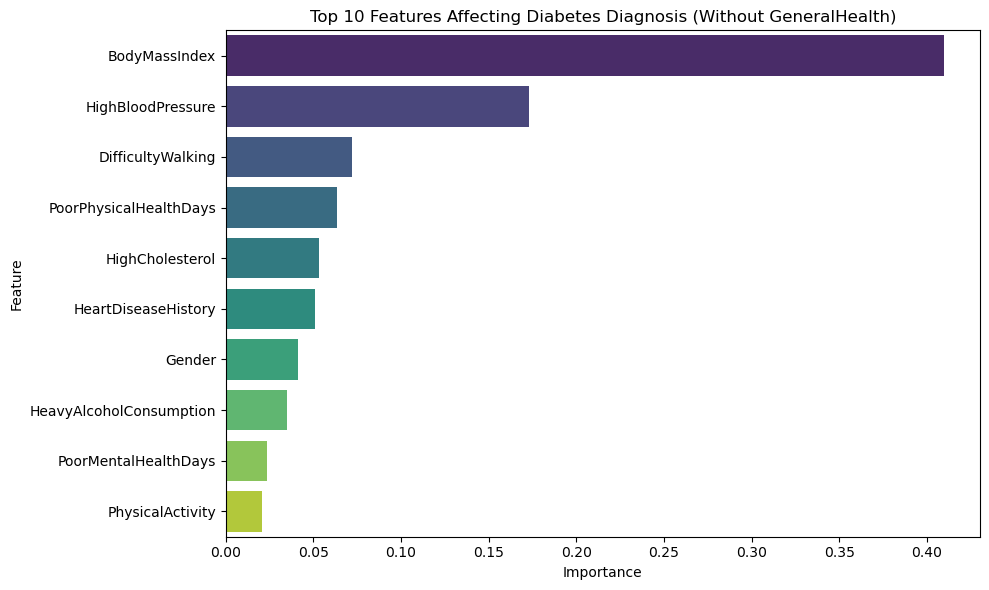

In [13]:
# Drop GeneralHealth from the feature set
X_age_72_no_general_health = X_age_72.drop(columns=['GeneralHealth'])

# Train/test split for the updated dataset
X_train_72_no_gh, X_test_72_no_gh, y_train_72_no_gh, y_test_72_no_gh = train_test_split(
    X_age_72_no_general_health, y_age_72, test_size=0.2, random_state=42
)

# Retrain the model without GeneralHealth
model_no_gh = GradientBoostingClassifier(
    learning_rate=0.05,
    max_depth=3,
    min_samples_split=10,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)
model_no_gh.fit(X_train_72_no_gh, y_train_72_no_gh)

# Evaluate the model
y_pred_no_gh = model_no_gh.predict(X_test_72_no_gh)
accuracy_no_gh = accuracy_score(y_test_72_no_gh, y_pred_no_gh)
print(f"Accuracy without GeneralHealth: {accuracy_no_gh:.3f}")

# Confusion matrix and feature importance
conf_matrix_no_gh = confusion_matrix(y_test_72_no_gh, y_pred_no_gh)
feature_importances_no_gh = model_no_gh.feature_importances_

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_no_gh, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix (Without GeneralHealth)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Visualize feature importances
feature_importance_df_no_gh = pd.DataFrame({
    'Feature': X_age_72_no_general_health.columns,
    'Importance': feature_importances_no_gh
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df_no_gh.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Features Affecting Diabetes Diagnosis (Without GeneralHealth)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Default Precision: 0.735
Classification Report (Default Threshold):
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.75      7090
         1.0       0.73      0.80      0.77      7049

    accuracy                           0.76     14139
   macro avg       0.76      0.76      0.76     14139
weighted avg       0.76      0.76      0.76     14139

Adjusted Precision with threshold 0.6: 0.766
Adjusted Recall with threshold 0.6: 0.699
Classification Report (Adjusted Threshold):
              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75      7090
         1.0       0.77      0.70      0.73      7049

    accuracy                           0.74     14139
   macro avg       0.75      0.74      0.74     14139
weighted avg       0.75      0.74      0.74     14139



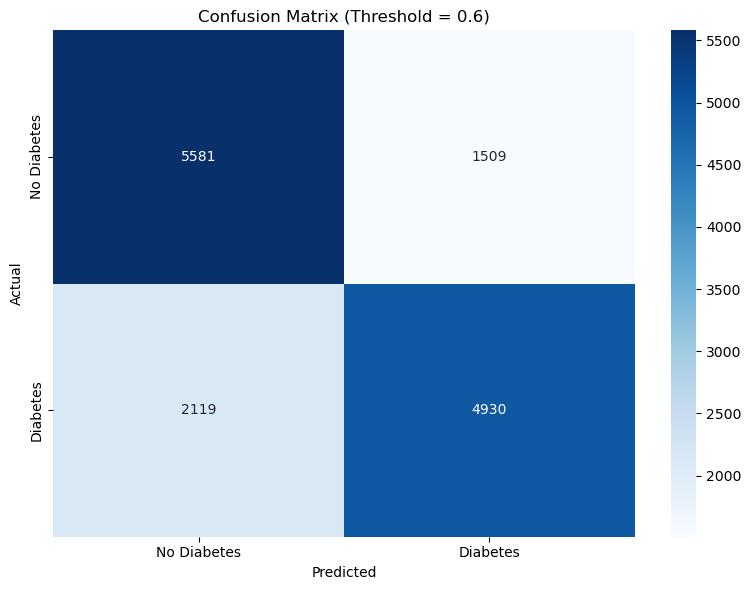

Precision with Class Balancing: 0.698
Recall with Class Balancing: 0.870
Classification Report (Class Balancing):
              precision    recall  f1-score   support

         0.0       0.83      0.63      0.71      7090
         1.0       0.70      0.87      0.77      7049

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.74     14139
weighted avg       0.76      0.75      0.74     14139



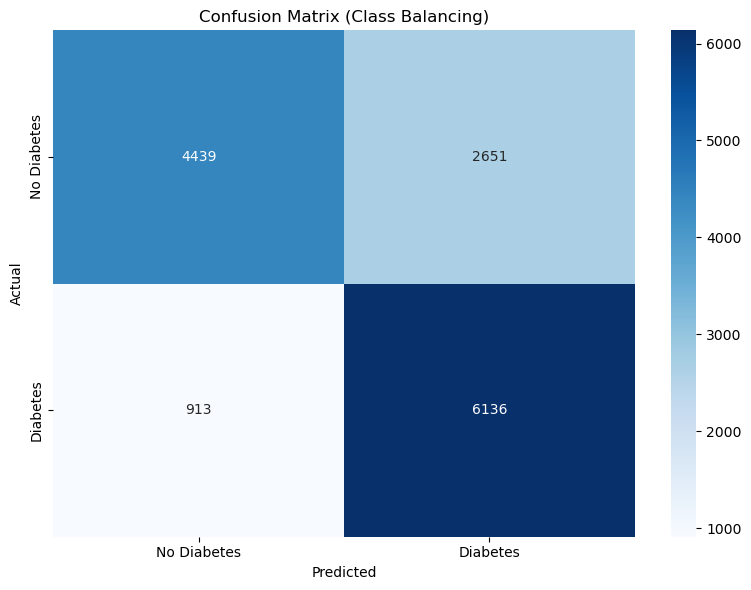

In [14]:
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the best model with the best parameters
best_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=5,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)
best_model.fit(X_train, y_train)

# Evaluate the model's default performance
y_pred_default = best_model.predict(X_test)
default_precision = precision_score(y_test, y_pred_default)
print(f"Default Precision: {default_precision:.3f}")
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred_default))

# Adjust threshold for improved precision
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
threshold = 0.6  # Adjust the threshold
y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

# Evaluate the model with the adjusted threshold
adjusted_precision = precision_score(y_test, y_pred_adjusted)
adjusted_recall = recall_score(y_test, y_pred_adjusted)
print(f"Adjusted Precision with threshold {threshold}: {adjusted_precision:.3f}")
print(f"Adjusted Recall with threshold {threshold}: {adjusted_recall:.3f}")
print("Classification Report (Adjusted Threshold):")
print(classification_report(y_test, y_pred_adjusted))

# Confusion Matrix for Adjusted Threshold
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adjusted, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Add class balancing with sample weights
weights = np.where(y_train == 1, 1.5, 1)  # Assign higher weight to the positive class
balanced_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=5,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)
balanced_model.fit(X_train, y_train, sample_weight=weights)

# Evaluate the model with class balancing
y_pred_balanced = balanced_model.predict(X_test)
balanced_precision = precision_score(y_test, y_pred_balanced)
balanced_recall = recall_score(y_test, y_pred_balanced)
print(f"Precision with Class Balancing: {balanced_precision:.3f}")
print(f"Recall with Class Balancing: {balanced_recall:.3f}")
print("Classification Report (Class Balancing):")
print(classification_report(y_test, y_pred_balanced))

# Confusion Matrix for Class Balancing
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_balanced, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix (Class Balancing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


Default Recall: 0.799
Classification Report (Default Threshold):
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.75      7090
         1.0       0.73      0.80      0.77      7049

    accuracy                           0.76     14139
   macro avg       0.76      0.76      0.76     14139
weighted avg       0.76      0.76      0.76     14139

Adjusted Precision with threshold 0.4: 0.699
Adjusted Recall with threshold 0.4: 0.868
Classification Report (Adjusted Threshold):
              precision    recall  f1-score   support

         0.0       0.83      0.63      0.71      7090
         1.0       0.70      0.87      0.77      7049

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.74     14139
weighted avg       0.76      0.75      0.74     14139



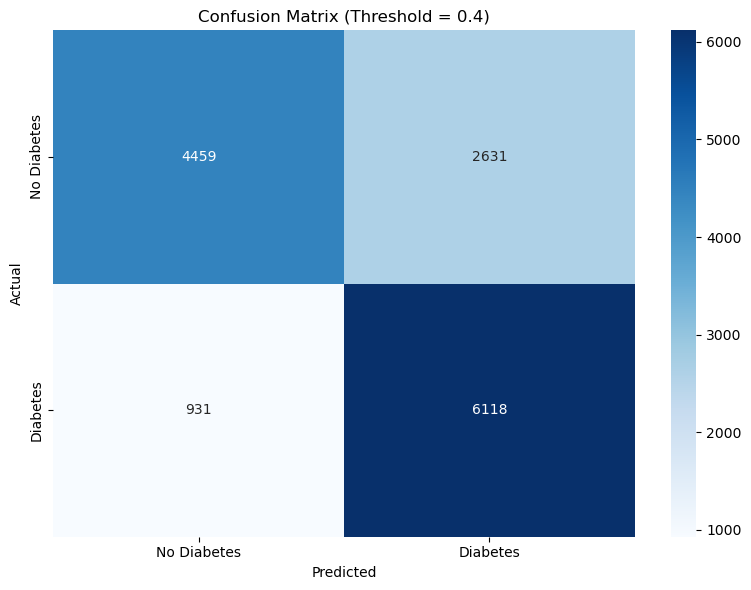

Precision with Class Balancing: 0.698
Recall with Class Balancing: 0.870
Classification Report (Class Balancing):
              precision    recall  f1-score   support

         0.0       0.83      0.63      0.71      7090
         1.0       0.70      0.87      0.77      7049

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.74     14139
weighted avg       0.76      0.75      0.74     14139



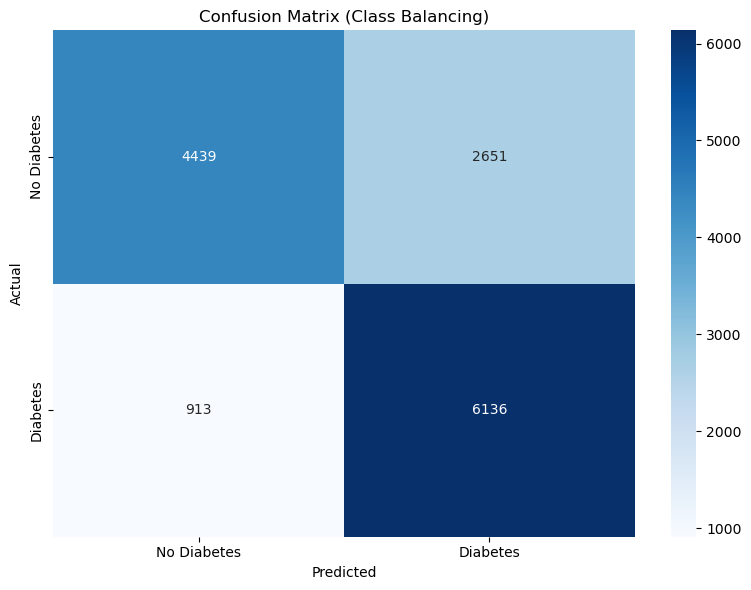

In [15]:
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Train the best model with the best parameters
best_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=5,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)
best_model.fit(X_train, y_train)

# Evaluate the model's default performance
y_pred_default = best_model.predict(X_test)
default_recall = recall_score(y_test, y_pred_default)
print(f"Default Recall: {default_recall:.3f}")
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred_default))

# Adjust threshold for improved recall
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
threshold = 0.4  # Lower threshold to improve recall
y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

# Evaluate the model with the adjusted threshold
adjusted_precision = precision_score(y_test, y_pred_adjusted)
adjusted_recall = recall_score(y_test, y_pred_adjusted)
print(f"Adjusted Precision with threshold {threshold}: {adjusted_precision:.3f}")
print(f"Adjusted Recall with threshold {threshold}: {adjusted_recall:.3f}")
print("Classification Report (Adjusted Threshold):")
print(classification_report(y_test, y_pred_adjusted))

# Confusion Matrix for Adjusted Threshold
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adjusted, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Add class balancing with sample weights for comparison
weights = np.where(y_train == 1, 1.5, 1)  # Assign higher weight to the positive class
balanced_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=5,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)
balanced_model.fit(X_train, y_train, sample_weight=weights)

# Evaluate the model with class balancing
y_pred_balanced = balanced_model.predict(X_test)
balanced_precision = precision_score(y_test, y_pred_balanced)
balanced_recall = recall_score(y_test, y_pred_balanced)
print(f"Precision with Class Balancing: {balanced_precision:.3f}")
print(f"Recall with Class Balancing: {balanced_recall:.3f}")
print("Classification Report (Class Balancing):")
print(classification_report(y_test, y_pred_balanced))

# Confusion Matrix for Class Balancing
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_balanced, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix (Class Balancing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


Accuracy: 0.756
Precision: 0.735
Recall: 0.799
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.75      7090
         1.0       0.73      0.80      0.77      7049

    accuracy                           0.76     14139
   macro avg       0.76      0.76      0.76     14139
weighted avg       0.76      0.76      0.76     14139



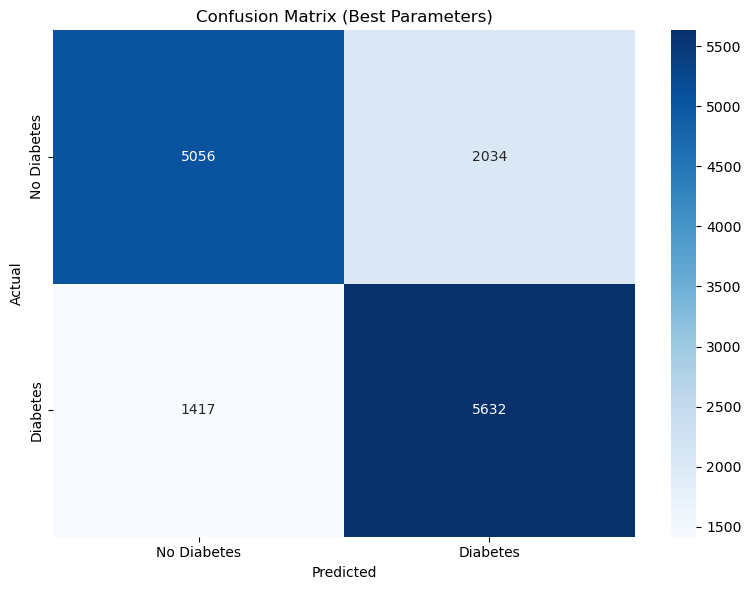

Adjusted Accuracy (Threshold = 0.4): 0.748
Adjusted Precision (Threshold = 0.4): 0.699
Adjusted Recall (Threshold = 0.4): 0.868


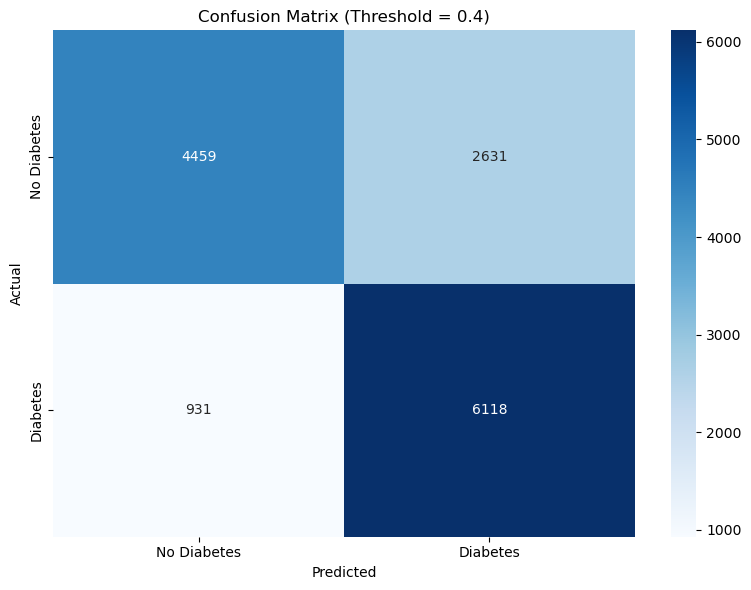

ROC-AUC: 0.832


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Gradient Boosting model with the best parameters
best_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=5,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)

# Train the model on the training set
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # For threshold adjustment

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix (Best Parameters)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Adjust threshold for higher recall (if needed)
threshold = 0.4
y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

adjusted_accuracy = accuracy_score(y_test, y_pred_adjusted)
adjusted_precision = precision_score(y_test, y_pred_adjusted)
adjusted_recall = recall_score(y_test, y_pred_adjusted)

print(f"Adjusted Accuracy (Threshold = {threshold}): {adjusted_accuracy:.3f}")
print(f"Adjusted Precision (Threshold = {threshold}): {adjusted_precision:.3f}")
print(f"Adjusted Recall (Threshold = {threshold}): {adjusted_recall:.3f}")

# Adjusted Confusion Matrix
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adjusted, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc:.3f}")


Default Accuracy: 0.756
Default Precision: 0.735
Default Recall: 0.799
Classification Report (Default Threshold):
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.75      7090
         1.0       0.73      0.80      0.77      7049

    accuracy                           0.76     14139
   macro avg       0.76      0.76      0.76     14139
weighted avg       0.76      0.76      0.76     14139



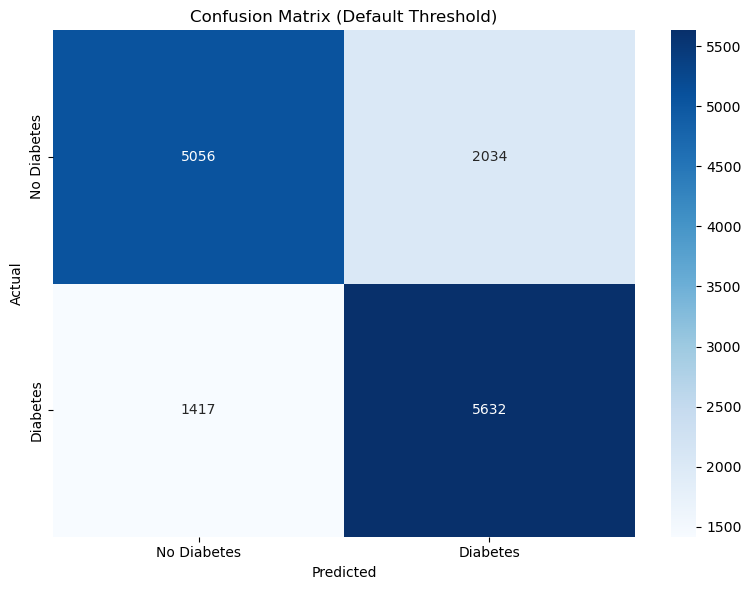

Adjusted Accuracy (Threshold = 0.4): 0.748
Adjusted Precision (Threshold = 0.4): 0.699
Adjusted Recall (Threshold = 0.4): 0.868
Classification Report (Adjusted Threshold):
              precision    recall  f1-score   support

         0.0       0.83      0.63      0.71      7090
         1.0       0.70      0.87      0.77      7049

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.74     14139
weighted avg       0.76      0.75      0.74     14139



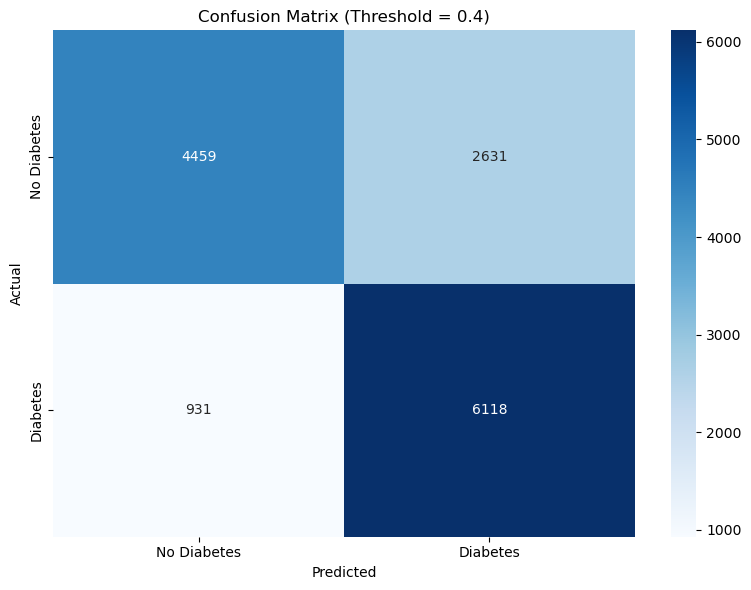

ROC-AUC: 0.832


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Gradient Boosting model with the best parameters
best_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=5,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)

# Train the model on the training set
best_model.fit(X_train, y_train)

# Evaluate the model on the test set using the default threshold
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # For threshold adjustment

# Metrics for default threshold
default_accuracy = accuracy_score(y_test, y_pred)
default_precision = precision_score(y_test, y_pred)
default_recall = recall_score(y_test, y_pred)

print(f"Default Accuracy: {default_accuracy:.3f}")
print(f"Default Precision: {default_precision:.3f}")
print(f"Default Recall: {default_recall:.3f}")

# Classification report for default threshold
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))

# Confusion Matrix for default threshold
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix (Default Threshold)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Adjust threshold for higher recall
threshold = 0.4
y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

# Metrics for adjusted threshold
adjusted_accuracy = accuracy_score(y_test, y_pred_adjusted)
adjusted_precision = precision_score(y_test, y_pred_adjusted)
adjusted_recall = recall_score(y_test, y_pred_adjusted)

print(f"Adjusted Accuracy (Threshold = {threshold}): {adjusted_accuracy:.3f}")
print(f"Adjusted Precision (Threshold = {threshold}): {adjusted_precision:.3f}")
print(f"Adjusted Recall (Threshold = {threshold}): {adjusted_recall:.3f}")

# Classification report for adjusted threshold
print("Classification Report (Adjusted Threshold):")
print(classification_report(y_test, y_pred_adjusted))

# Confusion Matrix for adjusted threshold
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adjusted, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC-AUC Score for both thresholds (same for default and adjusted)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc:.3f}")


Default Accuracy: 0.756
Default Precision: 0.735
Default Recall: 0.799
Classification Report (Default Threshold):
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.75      7090
         1.0       0.73      0.80      0.77      7049

    accuracy                           0.76     14139
   macro avg       0.76      0.76      0.76     14139
weighted avg       0.76      0.76      0.76     14139



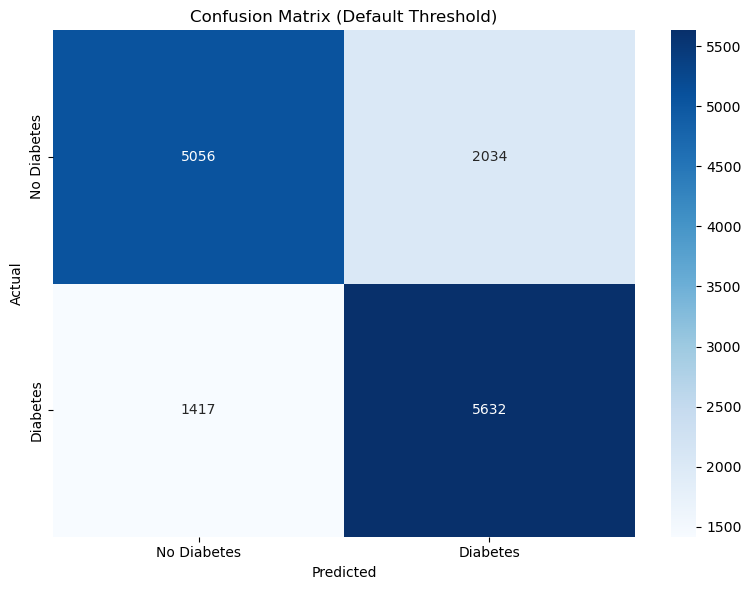

Adjusted Accuracy (Threshold = 0.4): 0.748
Adjusted Precision (Threshold = 0.4): 0.699
Adjusted Recall (Threshold = 0.4): 0.868
Classification Report (Adjusted Threshold):
              precision    recall  f1-score   support

         0.0       0.83      0.63      0.71      7090
         1.0       0.70      0.87      0.77      7049

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.74     14139
weighted avg       0.76      0.75      0.74     14139



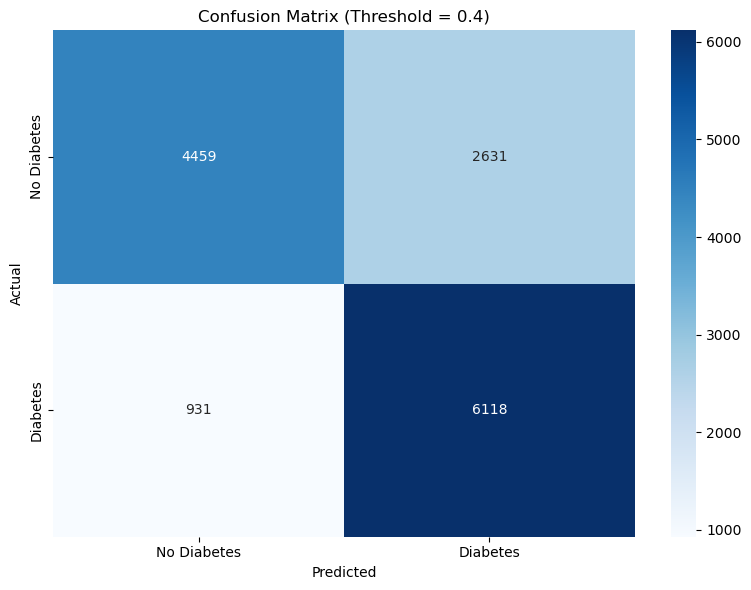

ROC-AUC: 0.832


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Gradient Boosting model with the best parameters
best_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=5,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)

# Train the model on the training set
best_model.fit(X_train, y_train)

# Evaluate the model on the test set using the default threshold
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # For threshold adjustment

# Metrics for default threshold
default_accuracy = accuracy_score(y_test, y_pred)
default_precision = precision_score(y_test, y_pred)
default_recall = recall_score(y_test, y_pred)

print(f"Default Accuracy: {default_accuracy:.3f}")
print(f"Default Precision: {default_precision:.3f}")
print(f"Default Recall: {default_recall:.3f}")

# Classification report for default threshold
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))

# Confusion Matrix for default threshold
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix (Default Threshold)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Adjust threshold for higher recall
threshold = 0.4
y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

# Metrics for adjusted threshold
adjusted_accuracy = accuracy_score(y_test, y_pred_adjusted)
adjusted_precision = precision_score(y_test, y_pred_adjusted)
adjusted_recall = recall_score(y_test, y_pred_adjusted)

print(f"Adjusted Accuracy (Threshold = {threshold}): {adjusted_accuracy:.3f}")
print(f"Adjusted Precision (Threshold = {threshold}): {adjusted_precision:.3f}")
print(f"Adjusted Recall (Threshold = {threshold}): {adjusted_recall:.3f}")

# Classification report for adjusted threshold
print("Classification Report (Adjusted Threshold):")
print(classification_report(y_test, y_pred_adjusted))

# Confusion Matrix for adjusted threshold
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adjusted, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC-AUC Score for both thresholds (same for default and adjusted)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc:.3f}")
